# [作業目標]
- 對資料做更多處理 : 顯示特定欄位的統計值與直方圖

# [作業重點]
- 試著顯示特定欄位的基礎統計數值 (In[4], Out[4], Hint : describe())
- 試著顯示特定欄位的直方圖 (In[5], Out[5], Hint : .hist())

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

# 設定 data_path
dir_data = './data/'

In [3]:
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

## 練習時間

觀察有興趣的欄位的資料分佈，並嘗試找出有趣的訊息
#### Eg
- 計算任意欄位的平均數及標準差
- 畫出任意欄位的[直方圖](https://zh.wikipedia.org/zh-tw/%E7%9B%B4%E6%96%B9%E5%9B%BE)

### Hints:
- [Descriptive Statistics For pandas Dataframe](https://chrisalbon.com/python/data_wrangling/pandas_dataframe_descriptive_stats/)
- [pandas 中的繪圖函數](https://amaozhao.gitbooks.io/pandas-notebook/content/pandas%E4%B8%AD%E7%9A%84%E7%BB%98%E5%9B%BE%E5%87%BD%E6%95%B0.html)


In [4]:
app_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
pd.options.display.float_format = '{:.2f}'.format

In [12]:
app_train['AMT_CREDIT'].describe()

count    307511.00
mean     599026.00
std      402490.78
min       45000.00
25%      270000.00
50%      513531.00
75%      808650.00
max     4050000.00
Name: AMT_CREDIT, dtype: float64

In [13]:
app_train['AMT_CREDIT'].cumsum()

0              406597.50
1             1700100.00
2             1835100.00
3             2147782.50
4             2660782.50
               ...      
307506   184205091874.50
307507   184205361424.50
307508   184206039088.50
307509   184206409195.50
307510   184207084195.50
Name: AMT_CREDIT, Length: 307511, dtype: float64

In [17]:
# Count the number of non-NA values
app_train['AMT_REQ_CREDIT_BUREAU_HOUR'].count()

265992

In [18]:
# 變異數
app_train['AMT_CREDIT'].var()

161998825566.80032

In [19]:
# 偏態
app_train['AMT_CREDIT'].skew()

1.2347784971349398

In [19]:
# 峰度
app_train['AMT_CREDIT'].kurt()

1.2347784971349398

In [12]:
app_train['AMT_CREDIT'].describe()

count    307511.00
mean     599026.00
std      402490.78
min       45000.00
25%      270000.00
50%      513531.00
75%      808650.00
max     4050000.00
Name: AMT_CREDIT, dtype: float64

In [21]:
# 相關係數矩陣
app_train.corr()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,...,0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00
TARGET,-0.00,1.00,0.02,-0.00,-0.03,-0.01,-0.04,-0.04,0.08,-0.04,...,-0.01,-0.00,0.00,0.00,0.00,0.00,0.00,-0.01,-0.00,0.02
CNT_CHILDREN,-0.00,0.02,1.00,0.01,0.00,0.02,-0.00,-0.03,0.33,-0.24,...,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.01,-0.01,-0.04
AMT_INCOME_TOTAL,-0.00,-0.00,0.01,1.00,0.16,0.19,0.16,0.07,0.03,-0.06,...,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.02,0.00,0.01
AMT_CREDIT,-0.00,-0.03,0.00,0.16,1.00,0.77,0.99,0.10,-0.06,-0.07,...,0.03,0.02,0.03,-0.02,-0.00,0.00,-0.00,0.05,0.02,-0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.01,0.00,-0.00,-0.00,0.23,1.00,0.22,-0.01,-0.00,-0.00
AMT_REQ_CREDIT_BUREAU_WEEK,0.00,0.00,-0.00,0.00,-0.00,0.01,-0.00,-0.00,-0.00,0.00,...,-0.00,-0.00,-0.00,0.00,0.00,0.22,1.00,-0.01,-0.02,0.02
AMT_REQ_CREDIT_BUREAU_MON,0.00,-0.01,-0.01,0.02,0.05,0.04,0.06,0.08,0.00,-0.03,...,-0.00,-0.00,0.00,-0.00,-0.00,-0.01,-0.01,1.00,-0.01,-0.00
AMT_REQ_CREDIT_BUREAU_QRT,0.00,-0.00,-0.01,0.00,0.02,0.01,0.02,-0.00,-0.01,0.02,...,-0.01,-0.00,-0.00,-0.00,-0.00,-0.00,-0.02,-0.01,1.00,0.08


In [20]:
# 共變異數矩陣
app_train.cov()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,10565820148.16,-59.04,-83.82,-44367771.22,-14197298.90,-644970.80,-8802091.34,1.21,-672773.47,19840118.34,...,4.70,0.42,2.48,0.53,-23.04,-24.97,44.17,45.72,83.69,895.50
TARGET,-59.04,0.07,0.00,-257.22,-3329.87,-50.61,-3990.17,-0.00,93.01,-1729.25,...,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,0.01
CNT_CHILDREN,-83.82,0.00,0.52,2205.82,623.57,223.71,-487.40,-0.00,1042.89,-24465.82,...,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.01,-0.00,-0.06
AMT_INCOME_TOTAL,-44367771.22,-257.22,2205.82,56227386501.17,14971679825.34,658700094.69,13987986326.20,245.31,28209624.95,-2151468108.13,...,66.65,13.93,1.29,-2.55,14.77,80.99,121.37,5619.74,958.42,5427.59
AMT_CREDIT,-14197298.90,-3329.87,623.57,14971679825.34,161998825566.80,4492694694.19,146770817627.89,555.24,-97371310.39,-3800574644.27,...,1240.76,206.93,281.17,-118.93,-132.58,190.00,-105.63,20190.89,5119.01,-36660.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,-24.97,0.00,-0.00,80.99,190.00,3.48,192.49,0.00,1.08,7.38,...,0.00,0.00,-0.00,-0.00,0.00,0.01,0.00,-0.00,-0.00,-0.00
AMT_REQ_CREDIT_BUREAU_WEEK,44.17,0.00,-0.00,121.37,-105.63,40.88,-76.56,-0.00,-1.18,88.72,...,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.04,-0.00,-0.00,0.01
AMT_REQ_CREDIT_BUREAU_MON,45.72,-0.00,-0.01,5619.74,20190.89,516.02,19203.11,0.00,5.41,-4453.03,...,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.84,-0.01,-0.01
AMT_REQ_CREDIT_BUREAU_QRT,83.69,-0.00,-0.00,958.42,5119.01,115.68,4847.84,-0.00,-40.38,1719.07,...,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.01,0.63,0.11


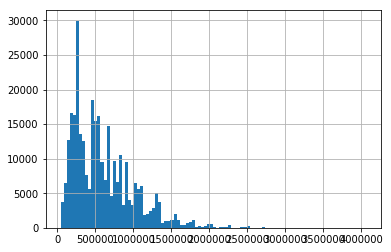

In [24]:
app_train['AMT_CREDIT'].hist(bins=100)